# HR Dataset - Statistics Review

## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference text.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as some categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [1]:
import pandas as pd

HR_data = pd.read_csv('HR_comma_sep.csv')

In [33]:
print(HR_data.shape)
print(HR_data.dtypes)
HR_data.head()

(14999, 10)
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
HR_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# correct typo in one column and convert another to lower case
HR_data.rename(columns={list(HR_data)[3]:'average_monthly_hours',
                        list(HR_data)[5]:'work_accident'}, inplace=True)
HR_data.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing some of these concepts to see if we can find some interesting paths to go down which may provide some insight into the inner workings of this company.

1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also compute the probability that a randomly selected employee left the company and experienced a work accident.
2. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?
3. Compute the variance and standard deviation of hours worked.
4. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?
5. Compute the mean satisfaction level for each salary category.  Comment on your results.
6. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$
7. What can you say about your results in part 6?
8. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$
9. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.
10. Suppose we were to pull a random sample of size 50 of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing some python code to do just that.


#### 1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also compute the probability that a randomly selected employee left the company and experienced a work accident.

In [7]:
# total number of data points (records in the data)
N = len(HR_data)
# proportion of employees who left the company (the probability of someone leaving)
len(HR_data[HR_data.left == 1]) / N

0.2380825388359224

In [8]:
len(HR_data[HR_data.work_accident == 1]) / N

0.1446096406427095

In [9]:
len(HR_data[(HR_data.left == 1) & (HR_data.work_accident == 1)]) / N

0.01126741782785519

#### 2. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?

In [9]:
# Part 2
import numpy as np
print(np.percentile(HR_data[HR_data.left == 1].satisfaction_level, 25),
      np.percentile(HR_data[HR_data.left == 1].satisfaction_level, 50),
      np.percentile(HR_data[HR_data.left == 1].satisfaction_level, 90))

print(np.percentile(HR_data[HR_data.left == 0].satisfaction_level, 25),
      np.percentile(HR_data[HR_data.left == 0].satisfaction_level, 50),
      np.percentile(HR_data[HR_data.left == 0].satisfaction_level, 90))

0.13 0.41 0.84
0.54 0.69 0.94


**Alternatives**

In [19]:
import numpy as np
# filter data according to 'left' and use list of percentiles in numpy.percentile function
print(np.percentile(HR_data[HR_data.left == 1].satisfaction_level, [25, 50, 90]))
print(np.percentile(HR_data[HR_data.left == 0].satisfaction_level, [25, 50, 90]))

[ 0.13  0.41  0.84]
[ 0.54  0.69  0.94]


In [33]:
from pandas import Series
# use pandas groupby with the `quantile` agg function
HR_data.groupby('left').satisfaction_level.quantile([0.25, 0.5, 0.9]).unstack()

,0.25,0.5,0.9
left,,,
0,0.54,0.69,0.94
1,0.13,0.41,0.84


**End Alternatives**

It would seem that the employees that left the company tended to also report a lower satisfaction level.  However to further investigate this result, we will have to perform some more sophisticated tests.

#### 3. Compute the variance and standard deviation of hours worked.

In [10]:
# variance and standard devation of monthly hours worked
(HR_data.average_monthly_hours.var(), HR_data.average_monthly_hours.std())

(2494.313174809979, 49.943099371284305)

**Alternative**

In [37]:
# use pandas `agg` method to get both var and std in one call
HR_data.average_monthly_hours.agg(['var','std'])

var    2494.313175
std      49.943099
Name: average_monthly_hours, dtype: float64

**End Alternative**

#### 4. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?

In [34]:
# Variance of satisfaction level of left vs. not left
(HR_data[HR_data.left == 0].satisfaction_level.var(), HR_data[HR_data.left == 1].satisfaction_level.var())

(0.04713404022655909, 0.06966085873834325)

**Alternative**

In [35]:
# Variance of satisfaction level of left vs. not left
HR_data.groupby('left').satisfaction_level.var()

left
0    0.047134
1    0.069661
Name: satisfaction_level, dtype: float64

**End Alternative**

The employees who left seem to have a larger range of satisfaction levels than those who stayed.  To make further inferences from this however, require techniques to come in later exercises.

#### 5. Compute the mean satisfaction level for each salary category.  Comment on your results.

In [38]:
# create empty dict
means = {}
# iterate over unique salary categories and 
# fill the dict with key:value pairs that are {salary category: mean satisfaction level}
for sal in HR_data.salary.unique():
    means[sal] = HR_data[HR_data.salary == sal].satisfaction_level.mean()
# show results
means

{'high': 0.6374696847211003,
 'low': 0.6007531437944199,
 'medium': 0.6218166304685063}

**Alternative**

In [40]:
# use pandas groupby to get mean salary for each salary category
HR_data.groupby('salary').satisfaction_level.mean()

salary
high      0.637470
low       0.600753
medium    0.621817
Name: satisfaction_level, dtype: float64

**End Alternative**

The highly and medium paid employees tend to have similar levels of work satisfaction while the lowest paid are a bit lower.

#### 6. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$

In [41]:
# First compute the mean and stdev
hours_mean = HR_data['average_monthly_hours'].mean()
hours_stdev = HR_data['average_monthly_hours'].std()
# mean + 2sigma
stdMean = hours_mean + 2*hours_stdev

# Now compute the components: P(salary) and P(hours > stdMean)
N = len(HR_data)  # total
# P(hours > stdMean)
p_hours = len(HR_data[HR_data.average_monthly_hours > stdMean]) / N
# P(salary): these are the proportions of each salary type in the data
p_salary = HR_data.salary.value_counts() / N

# Then compute p(salary | hours > stdMean)
# The number of each salary type that works > stdMean 
#  divided by the total number of workers who work > stdMean
p_salary_hours = (HR_data[HR_data.average_monthly_hours > stdMean].salary.value_counts() 
                  / len(HR_data[HR_data.average_monthly_hours > stdMean]))

# Finally use Bayes's Theorem to tie it all together and get P(hours > stdMean|salary)
p_hours_salary = (p_salary_hours * p_hours) / p_salary

In [42]:
p_hours_salary

low       0.013532
medium    0.008998
high      0.001617
Name: salary, dtype: float64

#### 7. What can you say about your results in part 6?

In [43]:
# a quick look at salary level proportions
p_salary

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [44]:
# P(salary|hours > stdMean)
# remeber that stdMean = mean hours + 2sigma
p_salary_hours

low       0.622642
medium    0.364780
high      0.012579
Name: salary, dtype: float64

The results in part 6 seem to suggest that given a random sample with a known salary category, then the result is most likely to be two standard deviations from the mean if it was a salary in the low category.  Naively this means that lower paid employees tend to work longer hours.

#### 8. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$


In [45]:
# Total number of employees
N = len(HR_data)

# proportion of employees who left
p_left = len(HR_data[HR_data.left == 1]) / N
# salary type proportions
p_salary = HR_data.salary.value_counts() / N

# P(salary|left): number of each salary type for those who left
#  divided by the total number who left
p_salary_left = (HR_data[HR_data.left == 1].salary.value_counts() 
                 / len(HR_data[HR_data.left == 1]))

# Use Bayes to get P(left|salary)
p_left_salary = (p_salary_left * p_left) / p_salary

In [46]:
p_left_salary

low       0.296884
medium    0.204313
high      0.066289
Name: salary, dtype: float64

In [47]:
p_salary_left

low       0.608233
medium    0.368804
high      0.022963
Name: salary, dtype: float64

These results seem to suggest that the highest paid employees are the least likely to leave the company.  This is probably due to them being, in fact, the highest paid and having little incentive to leave.

#### 9. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.

In [48]:
# total number of employees for each salary type
N = HR_data.salary.value_counts()

# proportions of employees who were promoted by salary type
got_p = HR_data[HR_data.promotion_last_5years == 1].salary.value_counts() / N
# proportions of employees who were NOT promoted by salary type
no_p = HR_data[HR_data.promotion_last_5years == 0].salary.value_counts() / N

# compute the odds for high and low salary employees and the ratio of the two
odds = (got_p["high"]/no_p["high"]) / (got_p["low"]/no_p["low"])

In [49]:
odds

6.788919235271166

Higher paid employees are nearly 7 times more likely to have received a promotion in the past five years.  This could mean several things.  It may mean that harder working employees are paid and promoted more.  However this could also just be a result that you would expect, since promotions and salaries increases ought to happen at the same time.  Further investigation, both statistical and perhaps speaking with the HR department itself, may be in order before drawing any solid conclusions from this.

#### 10. Suppose we were to pull a random sample of size 50 of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing some python code to do just that.

In [50]:
# create a list of 10 random samples of size 50 using a list comprehension
samples = [HR_data.sample(50).satisfaction_level for i in range(10)]
# create a list containing the mean of each individual sample
means = [samples[i].mean() for i in range(len(samples))]
means

[0.6208,
 0.638,
 0.6466000000000001,
 0.6074000000000003,
 0.6327999999999999,
 0.6549999999999998,
 0.6039999999999999,
 0.6284000000000002,
 0.5924,
 0.5802]

In [51]:
# compute the mean of the sample means
np.mean(means)

0.62056

In [52]:
# what is the mean satisfaction level for all the data?
HR_data.satisfaction_level.mean()

0.6128335222348166

The mean of each sample and the mean of all samples is nearly the same as the mean of the full data set.

## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin flip or medical test giving a positive or negative result.  Typically we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by

$$ P(X = x) = p^x (1 - p)^{1 - x} $$

Where $x$ is the outcome and $p$ is the probability of the positive outcome (1).

Bernoulli random variables crop up very often in statistical analysis &mdash; most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain some insight.

Using the HR data, answer the following.
1. Which variables in the HR data can be said to be Bernoulli random variables?
2. For the variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result, where $k$ is a placeholder for each variable.
3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.
4. For each of the k variables, compute the probability of randomly selecting 3500 employees with a positive result.  Comment on your answer.
5. For each of the k variables, compute the probability of randomly selecting 3500 **or less** with a positive result.  Comment on your answer.
6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

#### 1. Which variables in the HR data can be said to be Bernoulli random variables?

`work_accident`, `promotion_last_5years` , and `left`.

#### 2. For the variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result, where $k$ is a placeholder for each variable.

In [54]:
import pandas as pd
# compute the mean of each variable (this is equal to p)
p = HR_data[['work_accident', 'promotion_last_5years', 'left']].mean()
p

work_accident            0.144610
promotion_last_5years    0.021268
left                     0.238083
dtype: float64

#### 3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.

In [55]:
# from the Bernoulli equation for variance
var = p*(1 - p)
var

work_accident            0.123698
promotion_last_5years    0.020816
left                     0.181399
dtype: float64

#### 4. For each of the k variables, compute the probability of randomly selecting 3500 employees with a positive result.  Comment on your answer.

In [58]:
# import the binomial module from scipy
from scipy.stats import binom

N = len(HR_data)
# create a dict to hold each of the variables and their respective probabilities
b = {}
# iterate through the p values for each variable
# The `to_dict` method will convert the series 'p' to a dict
#  and the for loop iteratres through the keys of the dict
for x in p.to_dict():
    # instantiate a binomial distribution using our parameters
    #  for this variable
    myBinom = binom(n = N, p = p[x])
    # add the propability of selecting 3500 positives from this distribution
    #  to the 'b' dict.
    b[x] = myBinom.pmf(3500)
b

{'left': 0.0030366192962612546,
 'promotion_last_5years': 0.0,
 'work_accident': 3.3494533716445012e-183}

It appears that it is nearly impossible to draw 3500 employees with a positive result for `Work_accident` and `promotion_last_5years` while there is a small probability of choosing 3500 for `left` which is close to the mean.

#### 5. For each of the k variables, compute the probability of randomly selecting 3500 **or less** with a positive result.  Comment on your answer.

In [59]:
# init empty dict to store results
b = {}
# iterate through the variables as in part 5
for x in p.to_dict():
    # create the distribution
    myBinom = binom(n = N, p = p[x])
    # add the probability of selecting 3500 to the dict
    # this uses the CDF method instead of the PMF
    b[x] = myBinom.cdf(3500)
b

{'left': 0.088031181043273107,
 'promotion_last_5years': 0.99999999999999989,
 'work_accident': 0.99999999999999989}

In this case, it is very likely that at most 3500 have been drawn for `work_accident` and `promotion_last_5years`, but not quite so likely that at most 3500 have been drawn for `left`.

#### 6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

In [62]:
import matplotlib.pyplot as plt

# init empty dict to store y-values for each variable
b_pmf = {}
# iterate over variables
for x in p.to_dict():
    # list to store y-values
    y = []
    # iterate through range of total number of data points
    # each j-value will be the number of positive results from size N
    for j in range(N):
        # create binomial distribution with p = p[variable name]
        myBinom = binom(n = N, p = p[x])
        # append the probability of j successes to y-values
        y.append(myBinom.pmf(j))
    # add y-values for current variable to dict
    b_pmf[x] = y

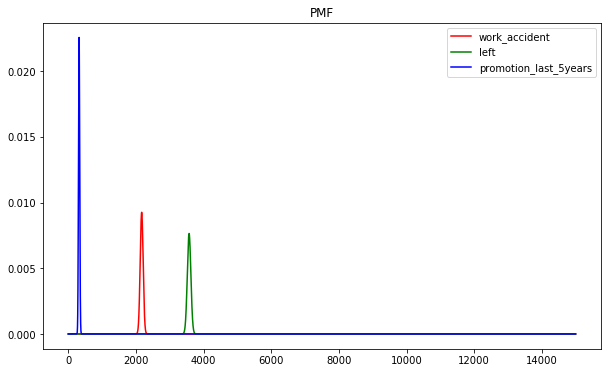

In [66]:
# set figure size
plt.figure(figsize=(10,6))
# plot the results one variable at a time
# and include a label parameter in each plot for use in the legend
plt.plot(b_pmf['work_accident'], 'r', label = 'work_accident')
plt.plot(b_pmf['left'], 'g', label = 'left')
plt.plot(b_pmf['promotion_last_5years'], 'b', label = 'promotion_last_5years')
# show the legend
plt.legend()
# set the title
plt.title('PMF')
plt.show()

In [67]:
# do the same as before for CDF
# this will take longer
b_cdf = {}
for x in p.to_dict():
    y = []
    for j in range(N):
        myBinom = binom(n = N, p = p[x])
        y.append(myBinom.cdf(j))
    b_cdf[x] = y

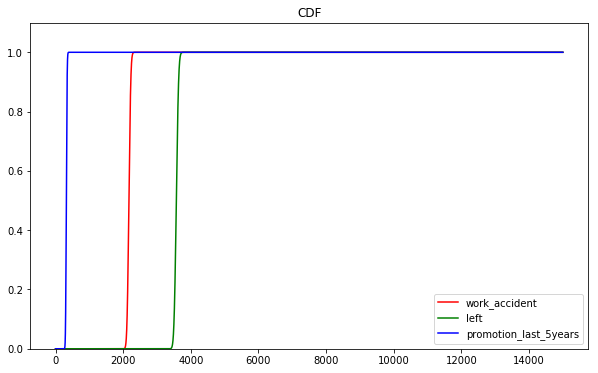

In [69]:
plt.figure(figsize=(10,6))
plt.plot(b_cdf['work_accident'], 'r', label = 'work_accident')
plt.plot(b_cdf['left'], 'g', label = 'left')
plt.plot(b_cdf['promotion_last_5years'], 'b', label = 'promotion_last_5years')
plt.ylim(ymax = 1.1, ymin = 0)
plt.legend()
plt.title('CDF')
plt.show()

In [70]:
# a quick look at the expected values
p * N

work_accident            2169.0
promotion_last_5years     319.0
left                     3571.0
dtype: float64

It would seem that both the PMF and CDF all spike around at the mean, or probability, of each of the respective variables.  This follows the intuition that the probability in a Bernoulli random variable is the expected number of outcomes.

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Guassian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, in can be shown that the means of random variables sampled repeatedly from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine some of the variables in the HR dataset and construct some normal distributions approximating them.

Using the HR data, answer the following

1. Which variables may be approximately normal?
2. For the variables in part 1, plot some histograms.
3. Compute the mean and variance for each of the variables used in parts 1 and 2.
4. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one.  Are they well approximated by normals?

#### 1. Which variables may be approximately normal?

In [48]:
import pandas as pd

# HR_data = pd.read_csv('../../data/HR_comma_sep.csv')

`satisfaction_level`, `last_evaluation`, and `average_monthly_hours`.  Although `timed spend_company` and `number_project` could be modeled using a continuous function, we will neglect them here, treating them as discrete.  `average_monthly_hours` could also be considered discrete, but we will treat it as continuous in this case.

#### 2. For the variables in part 1, plot some histograms.

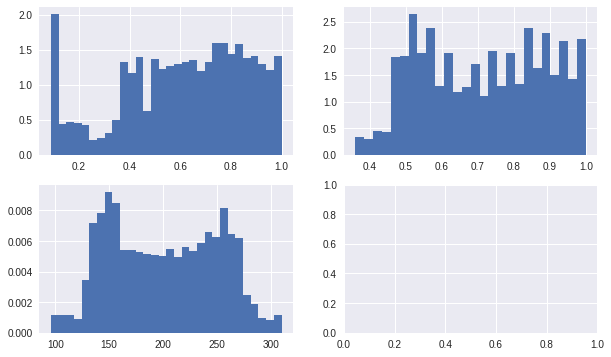

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# initialize a set of suplots
f, axarr = plt.subplots(2, 2, figsize=(10,6))
# each subplot has a coordinate in axarr
# plot a histogram for each variable at each of three of the four subplots
axarr[0, 0].hist(HR_data.satisfaction_level, normed = True, bins = 'auto')
axarr[0, 1].hist(HR_data.last_evaluation, normed = True, bins = 'auto')
axarr[1, 0].hist(HR_data.average_monthly_hours, normed = True, bins = 'auto')
# show inline
plt.show()

#### 3. Compute the mean and variance for each of the variables used in parts 1 and 2.

In [99]:
# compute for all three variables of interest
means = HR_data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']].mean()
var = HR_data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']].var()

#### 4. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part one.  Are they well approximated by normals?

In [101]:
np.linspace?

In [102]:
# import the normal distribution module from scipy
from scipy.stats import norm

# get only the data for variables of interest
myData = HR_data[['satisfaction_level', 'last_evaluation', 'average_monthly_hours']]
# create series that holds stdev for each variable
stds = myData.std()

# init empty dict to hold normal distributions for each var
normals = {}
# init dict to hold sequence of evenly spaced x-values for each var
x = {}
# iterate over the columns
for col in myData:
    # create normal distribution for current var based on the stats we computed
    normals[col] = norm(loc = means[col], scale = stds[col])
    # generate and add sequence for current col
    x[col] = np.linspace(normals[col].ppf(0.01),  # start
                         normals[col].ppf(0.99),  # stop
                         100)  # number of samples

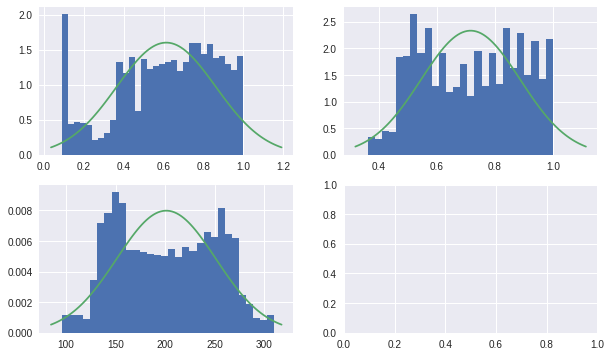

In [103]:
# plot the histograms just as before, but also include a normal curve for each subplot
f, axarr = plt.subplots(2, 2, figsize=(10,6))

axarr[0, 0].hist(HR_data.satisfaction_level, normed = True, bins = 'auto')
# include normal curve on same subplot
# the distribution from normals['satisfaction_level'] will generate y-values from the x-values
axarr[0, 0].plot(x['satisfaction_level'], normals['satisfaction_level'].pdf(x['satisfaction_level']))

axarr[0, 1].hist(HR_data.last_evaluation, normed = True, bins = 'auto')
axarr[0, 1].plot(x['last_evaluation'], normals['last_evaluation'].pdf(x['last_evaluation']))


axarr[1, 0].hist(HR_data.average_monthly_hours, normed = True, bins = 'auto')
axarr[1, 0].plot(x['average_monthly_hours'], normals['average_monthly_hours'].pdf(x['average_monthly_hours']))

plt.show()

**The upper-left distribution looks much closer to normal than the other two, which appear to be bimodal.**

The distributions look somewhat normal, but would need some transforms applied to them to get them into the proper shape.

### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts per unit time or space, such as the number of ad clicks or arriving flights, each per unit time. It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

1. What variables would be good candidates for modeling with a Poisson distribution?
2. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
3. For each salary level, compute the probability of obtaining at least the mean of each variable &mdash; regardless of salary level &mdash; by using the Poisson distributions you constructed in part 2.  Comment on your results.

#### 1. What variables would be good candidates for modeling with a Poisson distribution?

`number_project`, and `time_spend_company`

The latter could be thought of as the number of employees who leave in a unit of time.

#### 2. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.

In [112]:
import pandas as pd
from scipy.stats import poisson

# HR_data = pd.read_csv('../../data/HR_comma_sep.csv')

# get only data for vars we want
data = HR_data[['number_project', 'time_spend_company', 'salary']]
# array of unique salary types
sal_cats = HR_data.salary.unique()

# init dict to store a dict for each var
data_sub = {}
# iterate over the two Poisson candidate variables
for col in ('number_project', 'time_spend_company'):
    # dict to hold distribution object for each salary category
    # for current var
    cat_sub = {}
    # iterate over salary categories
    for cat in sal_cats:
        # mean for current var and salary category
        l = data[col][data.salary == cat].mean()
        # add poisson distribution for current mean
        cat_sub[cat] = poisson(mu = l)
        # print current var, category, mean just completed
        print(col, cat, l, cat_sub[cat].mean())
    # add distributions for current var
    data_sub[col] = cat_sub

number_project low 3.799890650628759 3.79989065063
number_project medium 3.8135277691591685 3.81352776916
number_project high 3.767178658043654 3.76717865804
time_spend_company low 3.4382176052487696 3.43821760525
time_spend_company medium 3.52901023890785 3.52901023891
time_spend_company high 3.692805173807599 3.69280517381


#### 3. For each salary level, compute the probability of obtaining at least the mean of each variable &mdash; regardless of salary level &mdash; by using the Poisson distributions you constructed in part 2.  Comment on your results.

In [117]:
# init dict to store dict of probabilities for each var
probs = {}
# iterate over vars
for col in ('number_project', 'time_spend_company'):
    # get mean from data for current var
    mean_temp = data[col].mean()
    # dict to hold probabilites for each salary category for current var
    probs_cat = {}
    # iterate over categories
    for cat in sal_cats:
        # compute probability for current cat using sf method (survival function)
        # from the distribution in the dict created in part 2
        # sf = 1-cdf is used for P(X > x)
        probs_cat[cat] = data_sub[col][cat].sf(mean_temp)
    # add dict of probs for current var
    probs[col] = probs_cat

In [119]:
probs

{'number_project': {'high': 0.5197772989110967,
  'low': 0.52649278489553697,
  'medium': 0.52927882346076038},
 'time_spend_company': {'high': 0.50434403111681059,
  'low': 0.44997869146511071,
  'medium': 0.4696141528359114}}

**Alternative**

In [118]:
from pandas import DataFrame as DF
DF(probs)

,number_project,time_spend_company
high,0.519777,0.504344
low,0.526493,0.449979
medium,0.529279,0.469614


**End Alternative**

The results suggest that the higher paid the employees are less likely to have more than an average number of projects but more likely to have longer than average tenure.

### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \sim N(\mu, \sigma^2/n) = \frac{\sqrt{n}}{\sigma \sqrt{2\pi}}e^{-n(\bar{X_n} - \mu)^2/\sigma^2}$$
In this exercise, you'll conduct some simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
2. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
3. Plot a histogram for each variable used in part 2.  Comment on your results.
4. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
5. Overlay an normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

#### 1. Choose two variables which may be good candidates to test this theorem.

In [120]:
import pandas as pd

# get only the data for variables of interest
data = HR_data[['satisfaction_level', 'number_project']]

#### 2. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.

In [121]:
# dict to store means
means = {}
# iterate over var names in data
for col in data:
    # create list of means for 1000 random samples of size 10 for current var
    # and store list in dict
    means[col] = [data[col].sample(10).mean() for i in range(1000)]

#### 3. Plot a histogram for each variable used in part 2.  Comment on your results.

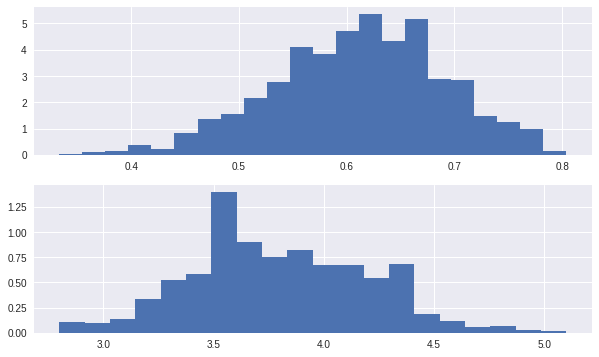

In [122]:
import matplotlib.pyplot as plt

# create 2 subplots (vertically stacked)
f, axarr = plt.subplots(2, figsize=(10,6))
# plot hist of sample means for first var on the top subplot
axarr[0].hist(means['satisfaction_level'], normed = True, bins = 'auto')
# plot hist of sample means for second var on the top subplot
axarr[1].hist(means['number_project'], normed = True, bins = 'auto')
plt.show()

The plots are starting to look a bit normal.

#### 4. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.

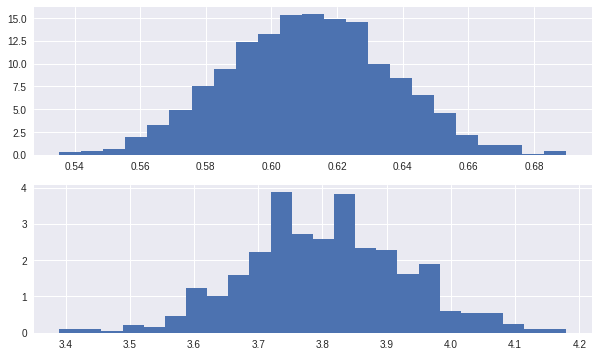

In [124]:
# n = 100
means = {}
for col in data:
    means[col] = [data[col].sample(100).mean() for i in range(1000)]
    
f, axarr = plt.subplots(2, figsize=(10,6)) 
axarr[0].hist(means['satisfaction_level'], normed = True, bins = 'auto')
axarr[1].hist(means['number_project'], normed = True, bins = 'auto')
plt.show()

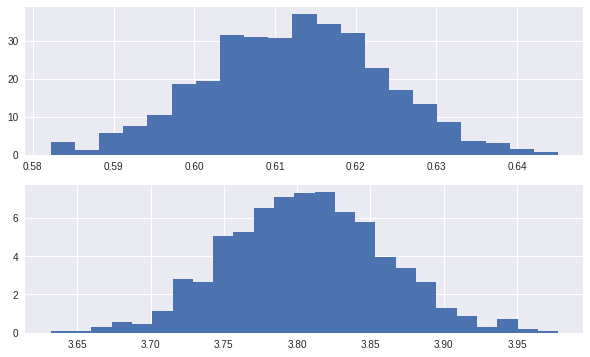

In [125]:
# n = 500
means = {}
for col in data:
    means[col] = [data[col].sample(500).mean() for i in range(1000)]

f, axarr = plt.subplots(2, figsize=(10,6))
axarr[0].hist(means['satisfaction_level'], normed = True, bins = 'auto')
axarr[1].hist(means['number_project'], normed = True, bins = 'auto')
plt.show()

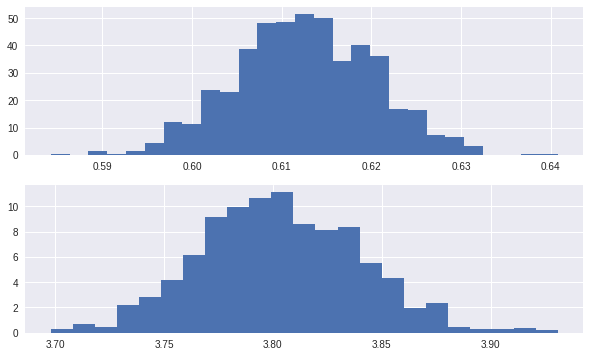

In [127]:
# n = 1000
means = {}
for col in data:
    means[col] = [data[col].sample(1000).mean() for i in range(1000)]

f, axarr = plt.subplots(2, figsize=(10,6))   
axarr[0].hist(means['satisfaction_level'], normed = True, bins = 'auto')
axarr[1].hist(means['number_project'], normed = True, bins = 'auto')
plt.show()

As the sample size increases, the plots look more normal.

#### 5. Overlay an normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

In [128]:
import numpy as np
# import normal distribution module
from scipy.stats import norm

# get stds and means for both vars in this data
stds = data.std()
# real: meaning the true mean of our data
means_real = data.mean()

# dict to store distributions
normals = {}
# store uniformly spaced x values
x = {}
# iterate over vars
for col in data:
    # create and add normal distribution object to normals dict
    normals[col] = norm(loc = means_real[col], scale = stds[col]/np.sqrt(1000))
    # create and store array of x values
    x[col] = np.linspace(normals[col].ppf(0.01),  # start
                         normals[col].ppf(0.99),  # stop
                         100)  # number of values

# w = [1/1000 for i in range(1000)]

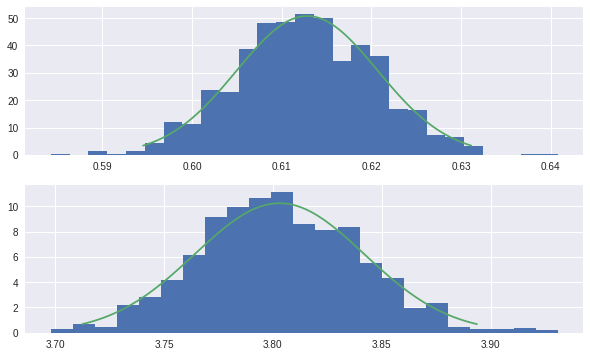

In [130]:
# create empty subplots
f, axarr = plt.subplots(2, figsize=(10,6))
# plot hist and normal curve on each subplot
axarr[0].hist(means['satisfaction_level'], normed = True, bins = 'auto')
axarr[0].plot(x['satisfaction_level'], normals['satisfaction_level'].pdf(x['satisfaction_level']))
axarr[1].hist(means['number_project'], normed = True, bins = 'auto')
axarr[1].plot(x['number_project'], normals['number_project'].pdf(x['number_project']))
plt.show()

After 1000 samples, the distribution of means is approximately normal.

## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what exactly we are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypotheses are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05 and is often called a "p-value".  If a test produces a p-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise you'll explore the HR data more and test some hypothesis.

Using the HR data, answer the following.

1. Compute a confidence interval for satisfaction levels, at the 95% confidence level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.
2. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, is the mean difference?  Comment on your results.  (Hint: Do the two populations have equal variance?)
3. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.
4. Test the hypothesis that the satisfaction level between each salary group, denoted k, differs signicantly from the mean.  Namely
    - $H_0: \mu - \mu_k = 0$
    - $H_a: \mu - \mu_k \ne 0$
5. How would you interpret your results in part 5?
6. Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?
7. Repeat parts 4-6 on a hypothesis of your choosing.
8. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

#### 1. Compute a confidence interval for satisfaction levels, at the 95% confidence level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.

In [134]:
import pandas as pd
# import statsmodels statistics api
import statsmodels.stats.api as sm

# HR_data = pd.read_csv('../../data/HR_comma_sep.csv')

# compute confidence intervals using t-distributions for satisfaction level for both stayed and left
{'stayed': sm.DescrStatsW(HR_data[HR_data.left == 0].satisfaction_level).tconfint_mean(alpha = 0.05),
 'left': sm.DescrStatsW(HR_data[HR_data.left == 1].satisfaction_level).tconfint_mean(alpha = 0.05)}

{'left': (0.43143847133170987, 0.44875755219111291),
 'stayed': (0.66282873590383407, 0.67079044505521401)}


In [65]:
# compute confidence intervals using normal distributions for satisfaction level for both stayed and left
{'stayed': sm.DescrStatsW(HR_data[HR_data.left == 0].satisfaction_level).zconfint_mean(alpha = 0.05),
 'left': sm.DescrStatsW(HR_data[HR_data.left == 1].satisfaction_level).zconfint_mean(alpha = 0.05)}

{'left': (0.43144140722566204, 0.44875461629716118),
 'stayed': (0.66282915756106608, 0.67079002339798266)}

The results for both the normal and t confidence intervals are nearly identical and indicate that employees who left the company have lower satisfaction levels.

#### 2. Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, is the mean difference?  Comment on your results.  (Hint: Do the two populations have equal variance?)

In [136]:
ttest_ind?

In [139]:
import pandas as pd
# import t-test method used for two independent samples
from scipy.stats import ttest_ind

# HR_data = pd.read_csv('../../data/HR_comma_sep.csv')

# perform two-sided t-test for the two samples (left, stayed)
ttest_ind(HR_data[HR_data.left == 0].satisfaction_level,  # satisfaction data for stayed
          HR_data[HR_data.left == 1].satisfaction_level,  # sastisfaction data for left
          equal_var = False)  # do not assume equal variance between samples

Ttest_indResult(statistic=46.636414352775716, pvalue=0.0)

In [140]:
HR_data[HR_data.left == 0].satisfaction_level.mean() - HR_data[HR_data.left == 1].satisfaction_level.mean()

0.22671157871810688

Since the pvalue $\approx$ 0, then the difference in mean between the two populations was significant and was found to be 0.23.  Note that this needed to be a one sided test!  To do so in python, the computed p-value must be divided by 2, which in this case is still 0.

#### 3. Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.

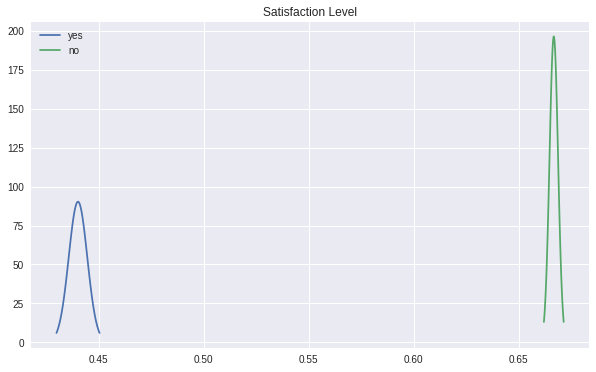

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# get satisfaction means for both left and stayed
means = {'no': HR_data[HR_data.left == 0].satisfaction_level.mean(),
         'yes': HR_data[HR_data.left == 1].satisfaction_level.mean()}
# get satisfaction sample stds for both left and stayed
# this requires division by sqrt(n) because it's a sample, not population
stds = {'no': HR_data[HR_data.left == 0].satisfaction_level.std()/np.sqrt(len(HR_data[HR_data.left == 0])),
        'yes': HR_data[HR_data.left == 1].satisfaction_level.std()/np.sqrt(len(HR_data[HR_data.left == 1]))}

normals = {}
x = {}
# iterate over no/yes for if they left
for key in means.keys():
    # create and store normal dist based on current mean/std
    normals[key] = norm(loc = means[key], scale = stds[key])
    # create and store uniformly spaced x-values
    x[key] = np.linspace(normals[key].ppf(0.01), normals[key].ppf(0.99), 100)

# plot distribution curves for each type: left and stayed
# set labels for legend
plt.figure(figsize=(10,6))
plt.plot(x['yes'], normals['yes'].pdf(x['yes']), label = 'yes')
plt.plot(x['no'], normals['no'].pdf(x['no']), label = 'no')
plt.title("Satisfaction Level")
# show legend
plt.legend()
plt.show()

The plots show that the two populations differ significantly from each other which is consistent with the results of the t-test.

#### 4. Test the hypothesis that the satisfaction level between each salary group, denoted k, differs signicantly from the mean.  Namely
- $H_0: \mu - \mu_k = 0$
- $H_a: \mu - \mu_k \ne 0$

In [144]:
# import one-sample t-test method
from scipy.stats import ttest_1samp
# compute mean of all satisfaction levels
mean_all = HR_data.satisfaction_level.mean()

t_group = {}
# iterate over salary levels
for grp in HR_data.salary.unique():
    # perform t-test for current level and store results
    t_group[grp] = ttest_1samp(HR_data[HR_data.salary == grp].satisfaction_level, mean_all)
t_group

{'high': Ttest_1sampResult(statistic=3.8205997501861702, pvalue=0.00013974368695866474),
 'low': Ttest_1sampResult(statistic=-4.0585381216022212, pvalue=4.9895149767038095e-05),
 'medium': Ttest_1sampResult(statistic=2.9429521364929117, pvalue=0.0032625787024487714)}

#### 5. How would you interpret your results in part 5?

The t-test indicated that all values differ from the mean signficantly as they all had p-values of less than 0.05.  This means that employees in each salary group, are all a significant distance from the mean.

#### 6. Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?

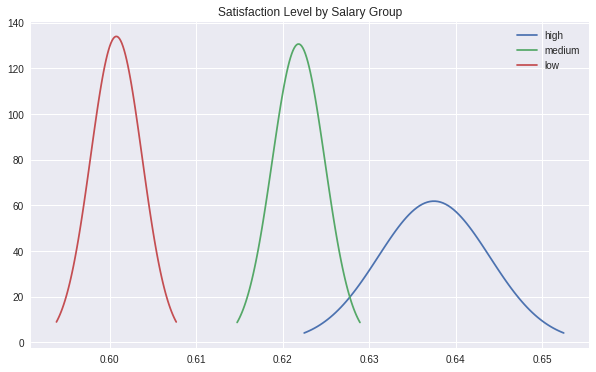

In [146]:
# compute and store satisfaction means for each salary level
means = {'high': HR_data[HR_data.salary == 'high'].satisfaction_level.mean(),
         'medium': HR_data[HR_data.salary == 'medium'].satisfaction_level.mean(),
         'low': HR_data[HR_data.salary == 'low'].satisfaction_level.mean()}
# compute and store satisfaction stds for each salary level
stds = {'high': HR_data[HR_data.salary == 'high'].satisfaction_level.std()/np.sqrt(len(HR_data[HR_data.salary == 'high'])),
        'medium': HR_data[HR_data.salary == 'medium'].satisfaction_level.std()/np.sqrt(len(HR_data[HR_data.salary == 'medium'])),
        'low':HR_data[HR_data.salary == 'low'].satisfaction_level.std()/np.sqrt(len(HR_data[HR_data.salary == 'low']))}

normals = {}
x = {}
#iterate over levels
for key in means.keys():
    # create and store normal distribution for current level
    normals[key] = norm(loc = means[key], scale = stds[key])
    # create and store uniformly spaced x-values
    x[key] = np.linspace(normals[key].ppf(0.01), normals[key].ppf(0.99), 100)
    
plt.figure(figsize=(10,6))
plt.plot(x['high'], normals['high'].pdf(x['high']), label = 'high')
plt.plot(x['medium'], normals['medium'].pdf(x['medium']), label = 'medium')
plt.plot(x['low'], normals['low'].pdf(x['low']), label = 'low')
plt.title("Satisfaction Level by Salary Group")
plt.legend()
plt.show()

It appears that the satisfaction levels of low paid employees are significantly lower than the higher paid, while the medium and high groups overlap slightly.

#### 8. Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

In [148]:
# compute high-medium effect size (difference between means)
effect_size = (HR_data[HR_data.salary == 'high'].satisfaction_level.mean() 
               - HR_data[HR_data.salary == 'medium'].satisfaction_level.mean())
# divide by std
effect_size = effect_size / HR_data.satisfaction_level.std()

# compute the high/medium count ratio
r = len(HR_data[HR_data.salary == 'high']) / len(HR_data[HR_data.salary == 'medium'])

# use statsmodels api to compute the power using the desired alpha
sm.TTestIndPower().power(effect_size, len(HR_data[HR_data.left == 0]), alpha = 0.05,
                         ratio = r)

0.77046543921945354

## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute some statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations
    - this is a lot like what you did when drawing many sample means

In this exercise you will implement this algorithm on the HR data.

Write a function that can perform boostrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.

In [74]:
import pandas as pd
import numpy as np

# HR_data = pd.read_csv('../../data/HR_comma_sep.csv')

In [149]:
def med_bstrap(col, n, b):
    """ Perform bootstrap of the median for a given column of data
        
        col : a column of data
        n : sample size
        b : number of bootstrapped samples
    """
    # list to store sample medians
    med = []
    # iterate through b loops
    for i in range(b):
        # get random sample with replacement of size n
        data_temp = col.sample(n = n, replace = True)
        # compute median of sample
        med_temp = np.median(data_temp)
        # store sample median
        med.append(med_temp)
    # return the list of sample medians
    return(med)

In [151]:
# run the function to bootstrap satisfaction level
# and compare mean of medians to the data median
(np.mean(med_bstrap(HR_data.satisfaction_level, 100, 100)),  # mean of bootstrapped median
 np.median(HR_data.satisfaction_level))  # data median

(0.63905000000000001, 0.64000000000000001)

In [152]:
# compute the std of sample medians
np.std(med_bstrap(HR_data.satisfaction_level, 100, 100))

0.037974300520220251